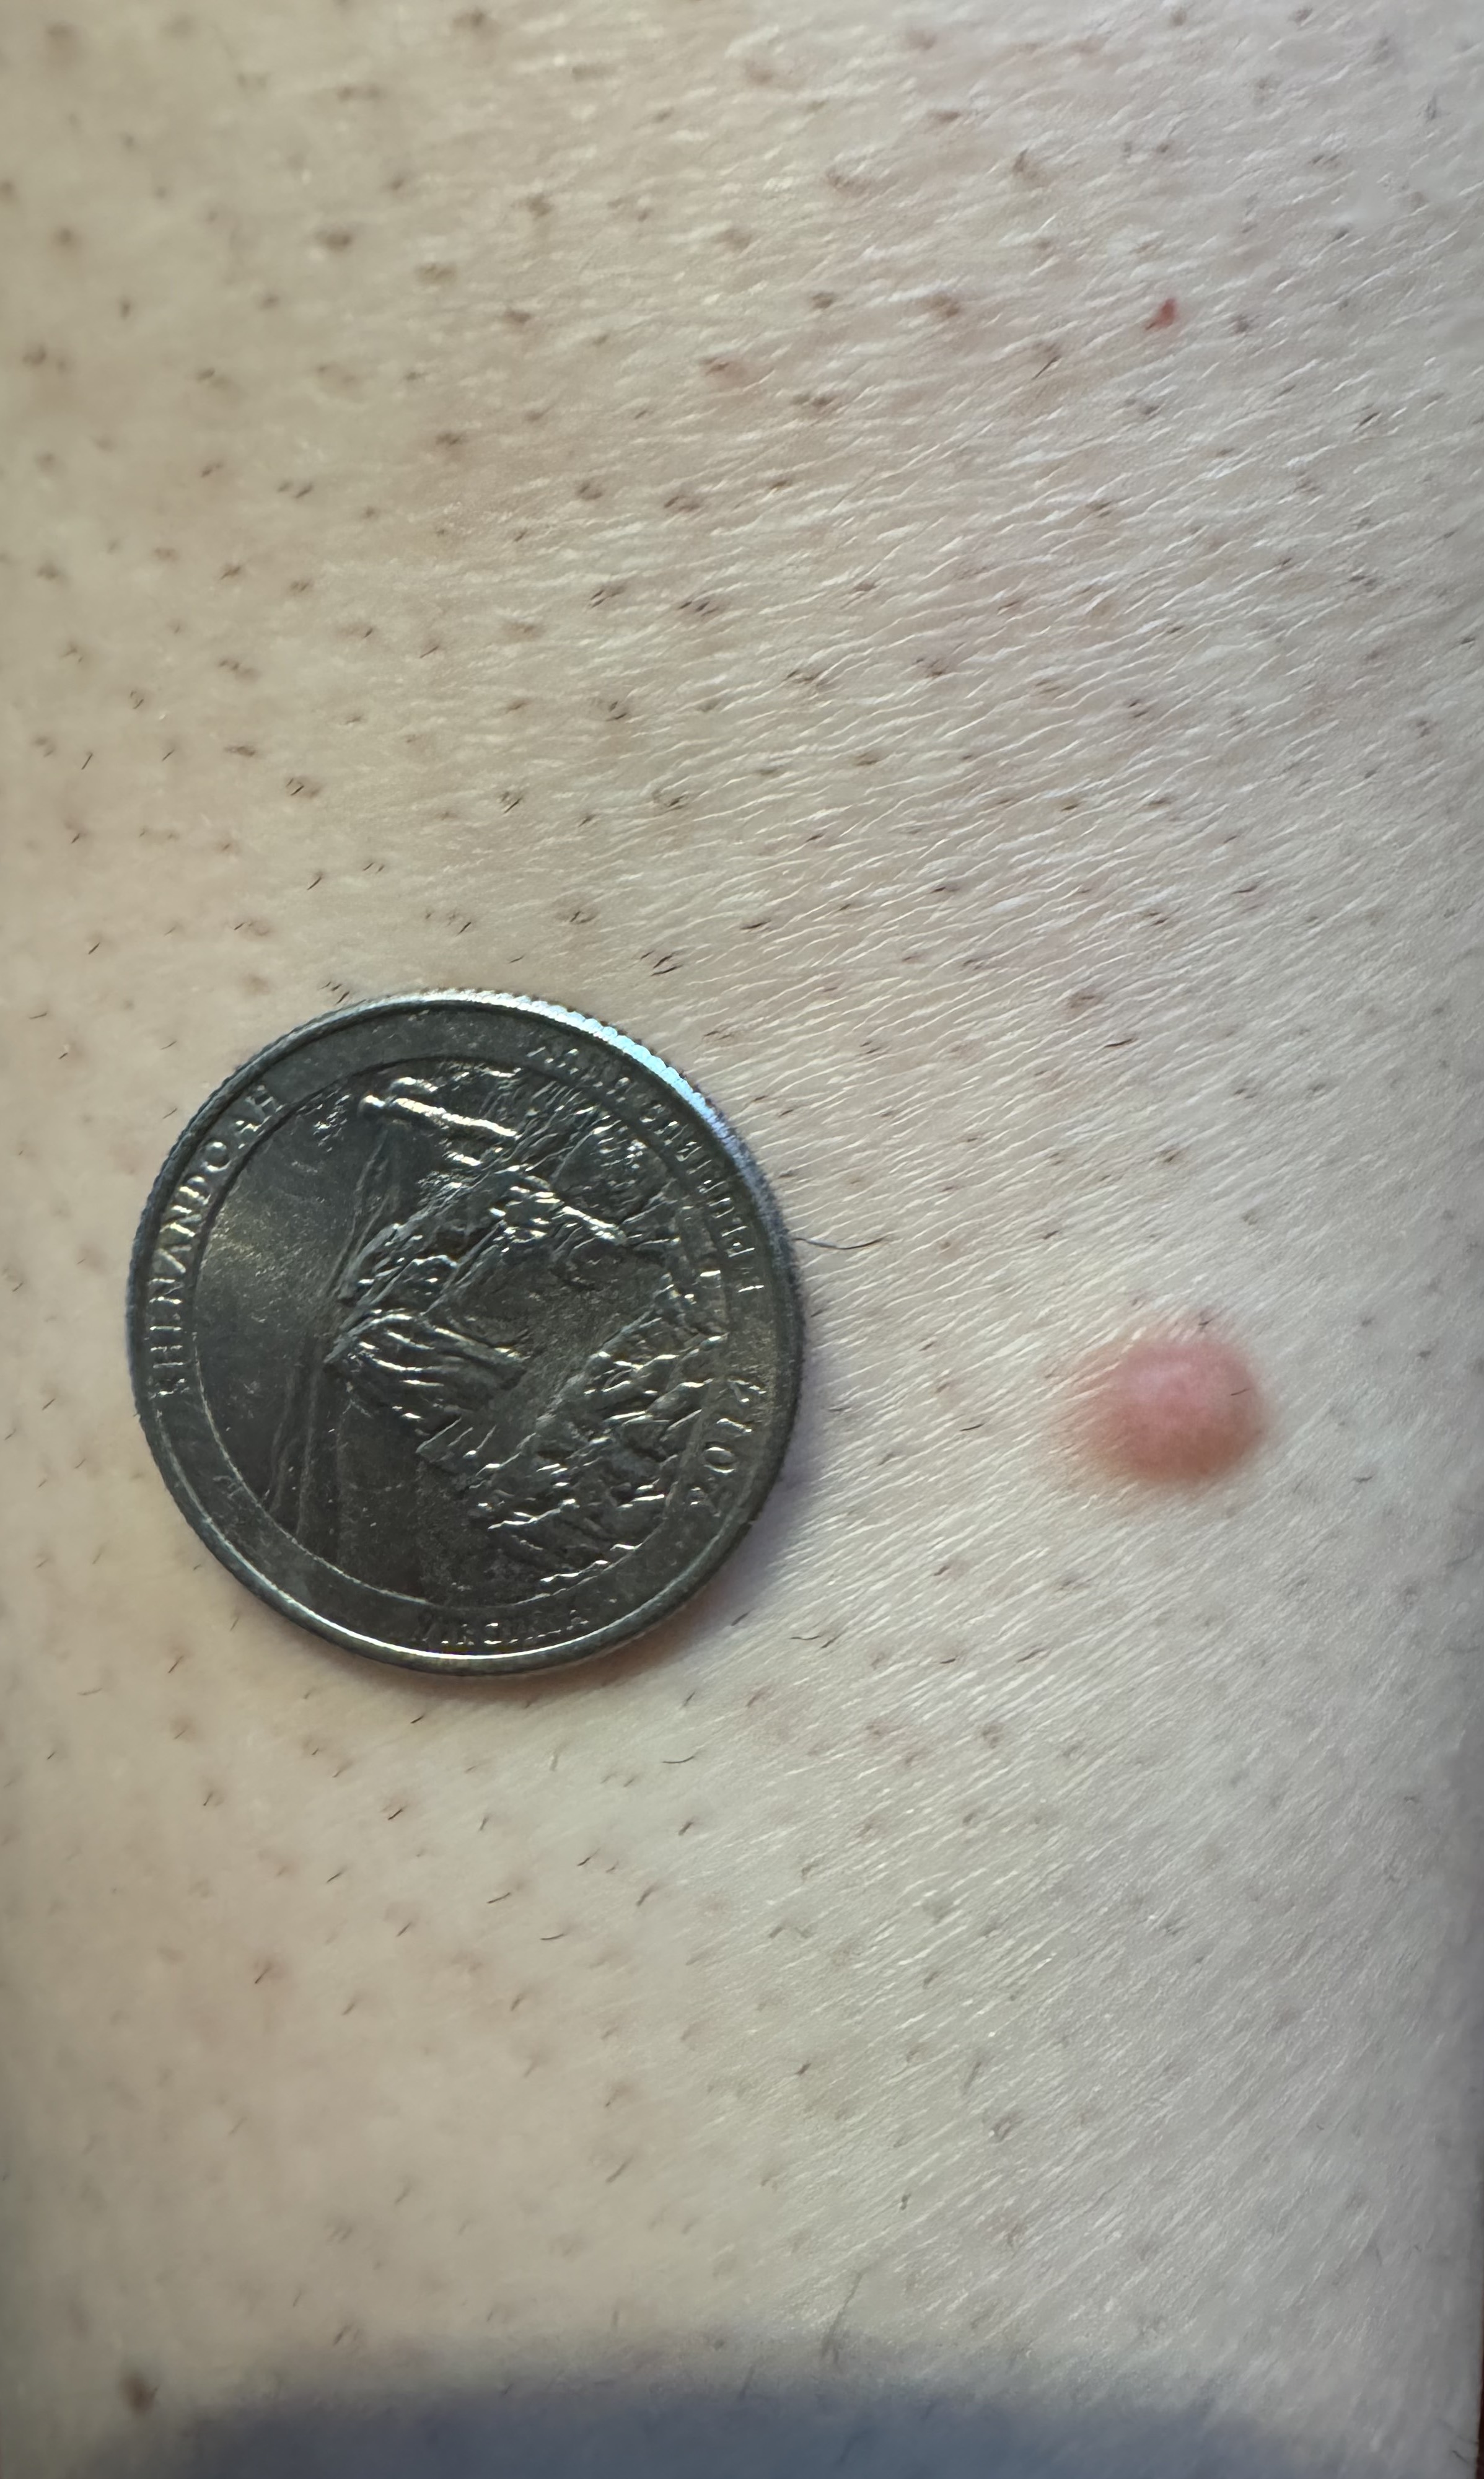

In [177]:
import cv2
import numpy as np
import imutils
from imutils import perspective
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/quarter3.jpeg")
cv2_imshow(image)

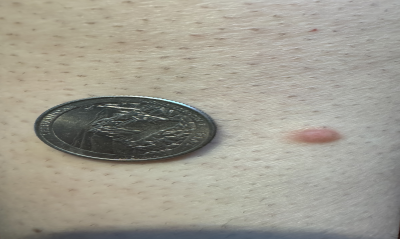

In [178]:
#proportional resize to about 400 x scale

image_resized = cv2.resize(image,(int(image.shape[0] / np.floor(image.shape[0]/400)) ,int(image.shape[1] / np.floor(image.shape[0]/400)) ), interpolation = cv2.INTER_AREA)
cv2_imshow(image_resized)

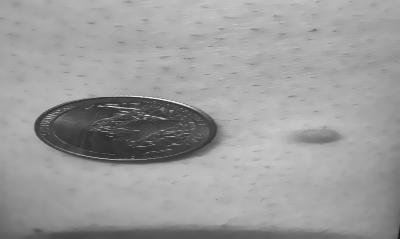

In [179]:
# gray scale and apply bilateralFilter
gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
# bilateralfilter to remove the noise edges
gray = cv2.bilateralFilter(gray, 9, 10, 10)

cv2_imshow(gray)

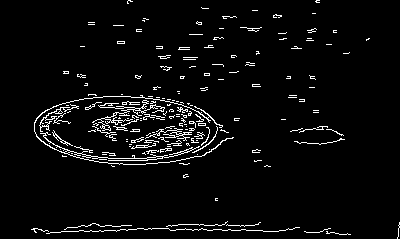

In [180]:
#apply canny edge detection
edged = cv2.Canny(gray, 50, 100)
cv2_imshow(edged)

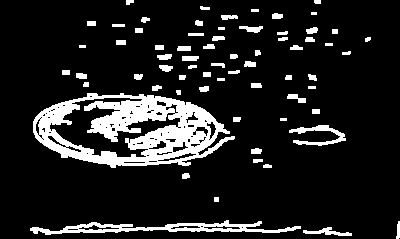

In [181]:
edged = cv2.dilate(edged, None, iterations=1)
cv2_imshow(edged)

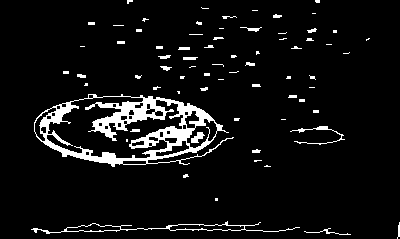

In [182]:
edged = cv2.erode(edged, None, iterations=1)
cv2_imshow(edged)

In [ ]:
# dilate followed by erodsion help remove noise

In [183]:
# Find contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

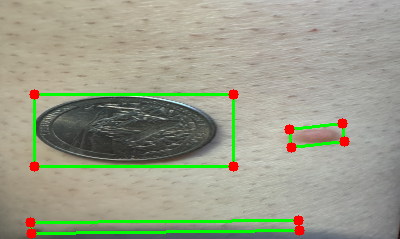

In [186]:
# Find contours

cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

orig = image_resized.copy()

orig_cen_y = image_resized.shape[0]/2
orig_cen_x = image_resized.shape[1]/2

box_dic = {}
# loop over the contours individually
idx = 0
for c in cnts:
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 40:
        continue

    # compute the rotated bounding box of the contour
    box = cv2.minAreaRect(c)

    box = cv2.boxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box

    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)


    # get the witdth and height of the bounding boxes
    width = np.linalg.norm(box[0] - box[1])
    height = np.linalg.norm(box[1] - box[2])
    area = width * height


    sum_x = 0
    sum_y = 0

    #lable the corners of the bounding boxes
    #calculate the bounding boxes centers
    for (x, y) in box:
        cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
        sum_x += int(x)
        sum_y += int(y)

    box_dic[f"box_{idx}"] = {"area" : area, "cen" : {"x" : sum_x/4, "y": sum_y/4}, "dim" : {"width": width, "height" : height}}
    idx += 1

# Display the output
cv2.waitKey(0)
cv2_imshow(orig)
cv2.destroyAllWindows()





In [187]:
box_dic

{'box_0': {'area': 2693.4417,
  'cen': {'x': 164.5, 'y': 226.25},
  'dim': {'width': 268.00748, 'height': 10.049875}},
 'box_1': {'area': 966.00214,
  'cen': {'x': 316.5, 'y': 135.0},
  'dim': {'width': 53.338543, 'height': 18.110771}},
 'box_2': {'area': 14328.0,
  'cen': {'x': 133.5, 'y': 130.0},
  'dim': {'width': 199.0, 'height': 72.0}}}

In [192]:
# sort the bounding boxes by distance to the center
sorted_boxes = sorted(box_dic.items(), key=lambda item: (((item[1]['cen']['x'] - orig_cen_x)/image_resized.shape[1]) ** 2 + ((item[1]['cen']['y'] - orig_cen_y)/image_resized.shape[0]) ** 2))
sorted_boxes = sorted_boxes[0:2]

In [193]:
sorted_boxes

[('box_2',
  {'area': 14328.0,
   'cen': {'x': 133.5, 'y': 130.0},
   'dim': {'width': 199.0, 'height': 72.0}}),
 ('box_1',
  {'area': 966.00214,
   'cen': {'x': 316.5, 'y': 135.0},
   'dim': {'width': 53.338543, 'height': 18.110771}})]

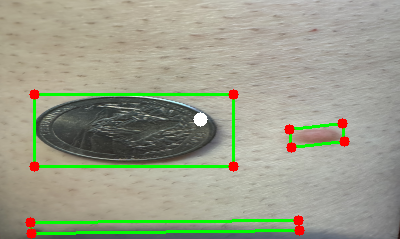

In [195]:
cv2.circle(orig, (int(orig_cen_x), int(orig_cen_y)), 7, (255, 255, 255), -1)
cv2_imshow(orig)

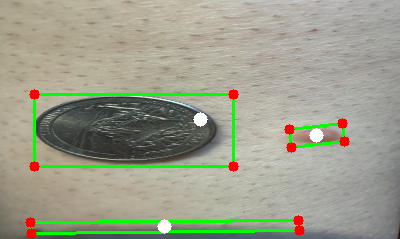

In [197]:
cv2.circle(orig, (int(box_dic["box_1"]["cen"]["x"]), int(box_dic["box_1"]["cen"]["y"])), 7, (255, 255, 255), -1)
cv2_imshow(orig)

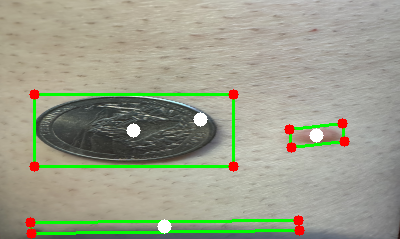

In [144]:
cv2.circle(orig, (int(box_dic["box_2"]["cen"]["x"]), int(box_dic["box_2"]["cen"]["y"])), 7, (255, 255, 255), -1)
cv2_imshow(orig)

In [169]:
def get_average_color(image, x, y, window_size):
    # Define the coordinates of the 5x5 window
    window_size = 5
    x_start = max(0, x - (window_size // 2))
    x_end = min(image.shape[1], x + (window_size // 2) + 1)
    y_start = max(0, y - (window_size // 2))
    y_end = min(image.shape[0], y + (window_size // 2) + 1)

    # Extract the region defined by the window
    window = image[y_start:y_end, x_start:x_end]

    # Calculate the average color
    average_color = np.mean(window, axis=(0, 1)).astype(int)

    return average_color

In [199]:
sorted_boxes[0][1]["color_array"] = get_average_color(orig, int(sorted_boxes[0][1]["cen"]["x"]), int(sorted_boxes[0][1]["cen"]["y"]), 9)
sorted_boxes[1][1]["color_array"] = get_average_color(orig, int(sorted_boxes[1][1]["cen"]["x"]), int(sorted_boxes[1][1]["cen"]["y"]), 9)

In [200]:
silver = np.array([192,192,192])
silver_area_real = np.pi * ((24.26/2)**2)
if np.linalg.norm(sorted_boxes[0][1]["color_array"] - silver) < np.linalg.norm(sorted_boxes[1][1]["color_array"] - silver):
  sorted_boxes[0][1]["real_area"] = silver_area_real
  sorted_boxes[0][1]["is_quarter"] = True
  sorted_boxes[1][1]["real_area"] = (sorted_boxes[1][1]["area"] / sorted_boxes[0][1]["area"])* silver_area_real
  sorted_boxes[1][1]["is_quarter"] = False
else :
  sorted_boxes[1][1]["real_area"] = silver_area_real
  sorted_boxes[1][1]["is_quarter"] = True
  sorted_boxes[0][1]["real_area"] = (sorted_boxes[0][1]["area"] / sorted_boxes[1][1]["area"])* silver_area_real
  sorted_boxes[0][1]["is_quarter"] = False

In [201]:
sorted_boxes

[('box_2',
  {'area': 14328.0,
   'cen': {'x': 133.5, 'y': 130.0},
   'dim': {'width': 199.0, 'height': 72.0},
   'color_array': array([71, 77, 74]),
   'real_area': 6856.128483974424,
   'is_quarter': False}),
 ('box_1',
  {'area': 966.00214,
   'cen': {'x': 316.5, 'y': 135.0},
   'dim': {'width': 53.338543, 'height': 18.110771},
   'color_array': array([255, 255, 255]),
   'real_area': 462.2442041119761,
   'is_quarter': True})]